In [42]:
import sys
sys.path.append("../")
import numpy as np 
from utils import *
from lattice import *
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensornetwork as tn

In [43]:
sps = 3
bd = 2
res = []
for seed in range(0, 5000):
    parent_dir = f"../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_{seed}/1_mel_Adam/lr_0.001_epoch_10000"
    try:
        u_path, lv = path_with_lowest_loss(parent_dir)
        u = np.load(u_path + "/u/0.npy")
    except:
        print(f"there are no matrix under the path = {parent_dir}")
        continue
    print(u_path)
    A = FF.block1D(bd, sps, bd, seed=seed)
    A_ = A.transpose(1,0,2)
    A_tilde = np.einsum("ijk,ilm->jlkm", A_, A_).reshape(4,4)
    sle = np.sort(np.abs(np.linalg.eigvals(A_tilde)))[::-1]
    print(sle.real)
    A2 = np.einsum("ijk,klm->jlim", A, A).reshape(sps**2, bd**2)
    U, s , V = np.linalg.svd(A2)
    Up = U[:, len(s):]
    h = Up @ Up.T
    max_gap = 0
    for L in range(4,5):
        H = sum_ham(h, [[i, (i + 1) % L] for i in range(L)], L, sps)
        E = np.linalg.eigvalsh(H)
        gap = E[1] - E[0]
        max_gap = max(gap, max_gap)
#         print(max_gap, seed)
    e = np.linalg.eigvalsh(h)
    h = np.load(f"../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_{seed}/1_mel_Adam/lr_0.001_epoch_10000/H/0.npy")
    U = np.kron(u,u)
    hu = U @ h @ U.T
    
    res.append({
        "seed" : seed,
        "E" : np.linalg.eigvalsh(H),
        "loss" : lv,
        "gap" : max_gap,
        "gap_loc" : e[1] - e[0],
        "gap_transfer" : sle.real[0] - sle.real[1],
        "n_0" : np.sum(np.round(hu,5) == 0)
    })
    print(f"finish seed = {seed}")

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_0/1_mel_Adam/lr_0.001_epoch_10000/loss_0.17388
[[ 0.00000000e+00  5.55111512e-17]
 [-5.55111512e-17  0.00000000e+00]]
[1.         0.46373257 0.1586023  0.12083966]
finish seed = 0
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00000
[[ 0.0000000e+00 -6.9388939e-17]
 [ 6.9388939e-17  0.0000000e+00]]
[1.         0.6621253  0.65081001 0.4673385 ]
finish seed = 1
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00002
[[ 0.00000000e+00 -3.46944695e-16]
 [ 3.46944695e-16  0.00000000e+00]]
[1.         0.93664979 0.2214984  0.20837675]
finish seed = 2
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3/1_mel_Adam/lr_0.001_epoch_10000/loss_0.26422
[[ 0.00000000e+00 -2.77555756e-17]
 [ 2.77555756e-17  0.00000000e+00]]
[1.         0.71713625 0.26870888 0.11347844]
finish seed = 3
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4/1_mel_Adam/lr_0.0

[1.         0.34245643 0.27068879 0.0969782 ]
finish seed = 51
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_52/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06506
[[ 0.00000000e+00  3.33066907e-16]
 [-3.33066907e-16  0.00000000e+00]]
[1.         0.13392519 0.06219197 0.05253087]
finish seed = 52
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_53/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_54/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_55/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_56/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_57/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_l

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_290/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06063
[[ 0.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  0.00000000e+00]]
[1.         0.33465325 0.29821421 0.24849522]
finish seed = 290
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_291/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01233
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.09430316 0.07819958 0.00996525]
finish seed = 291
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_292/1_mel_Adam/lr_0.001_epoch_10000/loss_0.17086
[[ 0.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  0.00000000e+00]]
[1.         0.36253116 0.31819722 0.07025765]
finish seed = 292
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_293/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01428
[[0. 0.]
 [0. 0.]]
[1.         0.23017518 0.02229428 0.00202415]
finish seed = 293
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_294/1_mel_Adam/lr_0.001_epoch_10000/loss_0.17864
[[

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_525/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00593
[[ 0.00000000e+00  2.22044605e-16]
 [-2.22044605e-16  0.00000000e+00]]
[1.         0.72320436 0.71622037 0.55916653]
finish seed = 525
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_526/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00059
[[ 0.0000000e+00 -6.9388939e-18]
 [ 6.9388939e-18  0.0000000e+00]]
[1.         0.34182687 0.2429215  0.07559175]
finish seed = 526
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_527/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06850
[[ 0.00000000e+00  8.32667268e-17]
 [-8.32667268e-17  0.00000000e+00]]
[1.         0.75414049 0.37978556 0.27520939]
finish seed = 527
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_528/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11060
[[ 0.00000000e+00 -1.66533454e-16]
 [ 1.66533454e-16  0.00000000e+00]]
[1.         0.39806439 0.32393515 0.06312367]
finish seed = 528
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_529

finish seed = 565
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_566/1_mel_Adam/lr_0.001_epoch_10000/loss_0.13395
[[ 0.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  0.00000000e+00]]
[1.         0.37504604 0.33334297 0.29922863]
finish seed = 566
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_567/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00705
[[0. 0.]
 [0. 0.]]
[1.         0.08074316 0.0207715  0.00680698]
finish seed = 567
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_568/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06524
[[ 0.00000000e+00  2.22044605e-16]
 [-2.22044605e-16  0.00000000e+00]]
[1.         0.14732901 0.07534398 0.03800394]
finish seed = 568
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_569/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15471
[[0. 0.]
 [0. 0.]]
[1.         0.6778175  0.4662342  0.31847269]
finish seed = 569
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_570/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09211
[[ 0.00000000e+00 -1.66533454e-16]
 

finish seed = 790
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_791/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03486
[[ 0.00000000e+00  3.46944695e-17]
 [-3.46944695e-17  0.00000000e+00]]
[1.         0.61972501 0.54399136 0.28977356]
finish seed = 791
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_792/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00352
[[ 0.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  0.00000000e+00]]
[1.         0.25933467 0.08574589 0.02766508]
finish seed = 792
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_793/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09162
[[ 0.00000000e+00 -2.22044605e-16]
 [ 2.22044605e-16  0.00000000e+00]]
[1.         0.5589193  0.3355339  0.29150493]
finish seed = 793
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_794/1_mel_Adam/lr_0.001_epoch_10000/loss_0.23661
[[ 0.00000000e+00  1.11022302e-16]
 [-1.11022302e-16  0.00000000e+00]]
[1.         0.48413056 0.28551849 0.22222471]
finish seed = 794
../array/torch/FF1D_loc_quetta/s_3

finish seed = 1503
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1504/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1505/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1506/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1507/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1508/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1509/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_1510/1_mel_Adam/lr_0.001_epoch_10000
there are no matrix under the path = ../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_15

[1.         0.49129391 0.3608361  0.12478875]
finish seed = 2025
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2026/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00761
[[ 0.00000000e+00  5.55111512e-17]
 [-5.55111512e-17  0.00000000e+00]]
[1.         0.29922886 0.26806327 0.08404666]
finish seed = 2026
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2027/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04663
[[0. 0.]
 [0. 0.]]
[1.         0.15525003 0.03445501 0.00607407]
finish seed = 2027
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2028/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09469
[[0. 0.]
 [0. 0.]]
[1.         0.81778978 0.67402933 0.6715896 ]
finish seed = 2028
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2029/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02891
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.48003798 0.34110517 0.19736648]
finish seed = 2029
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2030/1_mel_Adam/lr_0.001_epoch

[1.         0.69277792 0.22502763 0.1552139 ]
finish seed = 2071
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2072/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00617
[[ 0.00000000e+00 -2.49800181e-16]
 [ 2.49800181e-16  0.00000000e+00]]
[1.         0.33960028 0.03502683 0.00950566]
finish seed = 2072
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2073/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11036
[[ 0.00000000e+00  2.77555756e-17]
 [-2.77555756e-17  0.00000000e+00]]
[1.         0.45970208 0.11200062 0.10474454]
finish seed = 2073
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2074/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08198
[[ 0.00000000e+00  2.22044605e-16]
 [-2.22044605e-16  0.00000000e+00]]
[1.         0.63359018 0.44722003 0.30922839]
finish seed = 2074
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2075/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05738
[[ 0.00000000e+00 -1.66533454e-16]
 [ 1.66533454e-16  0.00000000e+00]]
[1.         0.23903507 0.22262862 0.08251153

finish seed = 2109
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2110/1_mel_Adam/lr_0.001_epoch_10000/loss_0.18436
[[ 0.00000000e+00 -2.11636264e-16]
 [ 2.11636264e-16  0.00000000e+00]]
[1.         0.68078434 0.23634232 0.17338842]
finish seed = 2110
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2111/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03691
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.6135597  0.18773359 0.14505531]
finish seed = 2111
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2112/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11381
[[ 0.0000000e+00  6.9388939e-18]
 [-6.9388939e-18  0.0000000e+00]]
[1.         0.3873238  0.29084003 0.17470718]
finish seed = 2112
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2113/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12745
[[ 0.00000000e+00  4.16333634e-17]
 [-4.16333634e-17  0.00000000e+00]]
[1.         0.67859131 0.21736772 0.21585169]
finish seed = 2113
../array/torch/FF1D_loc_quett

finish seed = 2158
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2159/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03629
[[ 0.00000000e+00 -1.66533454e-16]
 [ 1.66533454e-16  0.00000000e+00]]
[1.         0.3235899  0.31929891 0.13024264]
finish seed = 2159
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2160/1_mel_Adam/lr_0.001_epoch_10000/loss_0.13985
[[0. 0.]
 [0. 0.]]
[1.         0.44821465 0.27146431 0.26813927]
finish seed = 2160
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2161/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03838
[[ 0.00000000e+00  5.55111512e-17]
 [-5.55111512e-17  0.00000000e+00]]
[1.         0.52790298 0.14785961 0.12307315]
finish seed = 2161
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2162/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06486
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.6241358  0.09755197 0.0254737 ]
finish seed = 2162
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2163/1_mel_Adam/lr_0.001

finish seed = 2214
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2215/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08590
[[ 0.00000000e+00 -2.22044605e-16]
 [ 2.22044605e-16  0.00000000e+00]]
[1.         0.16480698 0.0815332  0.04603963]
finish seed = 2215
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2216/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00059
[[ 0.00000000e+00  5.55111512e-17]
 [-5.55111512e-17  0.00000000e+00]]
[1.         0.23645103 0.06543014 0.01779025]
finish seed = 2216
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2217/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00987
[[0. 0.]
 [0. 0.]]
[1.         0.10335926 0.10282478 0.0120556 ]
finish seed = 2217
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2218/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00064
[[ 0.00000000e+00  4.16333634e-17]
 [-4.16333634e-17  0.00000000e+00]]
[1.         0.42175265 0.29899546 0.1194321 ]
finish seed = 2218
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2219/1_mel_Adam/lr_0.001

finish seed = 2263
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2264/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04538
[[ 0.00000000e+00  5.55111512e-17]
 [-5.55111512e-17  0.00000000e+00]]
[1.         0.05977736 0.05133    0.05064353]
finish seed = 2264
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2265/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03579
[[ 0.0000000e+00 -6.9388939e-17]
 [ 6.9388939e-17  0.0000000e+00]]
[1.         0.38127177 0.07643882 0.02913938]
finish seed = 2265
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2266/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14626
[[ 0.00000000e+00  1.38777878e-17]
 [-1.38777878e-17  0.00000000e+00]]
[1.         0.32163406 0.20495974 0.12955514]
finish seed = 2266
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2267/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09688
[[0. 0.]
 [0. 0.]]
[1.         0.24831326 0.18414585 0.18200512]
finish seed = 2267
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2268/1_mel_Adam/lr_0.001_epo

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2320/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00004
[[ 0.00000000e+00  1.66533454e-16]
 [-1.66533454e-16  0.00000000e+00]]
[1.         0.50407156 0.41912203 0.38387275]
finish seed = 2320
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2321/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06839
[[ 0.0000000e+00  6.9388939e-18]
 [-6.9388939e-18  0.0000000e+00]]
[1.         0.75702889 0.12320156 0.01580128]
finish seed = 2321
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2322/1_mel_Adam/lr_0.001_epoch_10000/loss_0.17841
[[ 0.00000000e+00  1.11022302e-16]
 [-1.11022302e-16  0.00000000e+00]]
[1.         0.50739251 0.43034751 0.0906521 ]
finish seed = 2322
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_2323/1_mel_Adam/lr_0.001_epoch_10000/loss_0.13107
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.33639202 0.23899643 0.08902819]
finish seed = 2323
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_

finish seed = 3028
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3029/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04043
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.70625379 0.08945144 0.08116963]
finish seed = 3029
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3030/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15548
[[ 0.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  0.00000000e+00]]
[1.         0.28508667 0.19538583 0.18372258]
finish seed = 3030
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3031/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09005
[[ 0.00000000e+00 -1.38777878e-17]
 [ 1.38777878e-17  0.00000000e+00]]
[1.         0.42523232 0.22726056 0.19809944]
finish seed = 3031
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3032/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16955
[[0. 0.]
 [0. 0.]]
[1.         0.37678841 0.22949461 0.19640491]
finish seed = 3032
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3033/1_mel_Adam/lr_0.001

finish seed = 3077
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3078/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00616
[[ 0.00000000e+00  1.11022302e-16]
 [-1.11022302e-16  0.00000000e+00]]
[1.         0.58519311 0.46294213 0.33713982]
finish seed = 3078
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3079/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11981
[[ 0.00000000e+00 -2.77555756e-17]
 [ 2.77555756e-17  0.00000000e+00]]
[1.         0.38997057 0.27202907 0.08657708]
finish seed = 3079
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3080/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00204
[[ 0.00000000e+00  1.11022302e-16]
 [-1.11022302e-16  0.00000000e+00]]
[1.         0.26268767 0.01720976 0.01441382]
finish seed = 3080
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3081/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00396
[[0. 0.]
 [0. 0.]]
[1.         0.3443361  0.01881758 0.01564182]
finish seed = 3081
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3082/1_mel_Adam/lr_0.001

finish seed = 3121
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3122/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02936
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.4351026  0.26216511 0.0565984 ]
finish seed = 3122
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3123/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09415
[[ 0.00000000e+00  2.77555756e-17]
 [-2.77555756e-17  0.00000000e+00]]
[1.         0.47883082 0.14863286 0.05464537]
finish seed = 3123
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3124/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02021
[[ 0.00000000e+00  5.55111512e-17]
 [-5.55111512e-17  0.00000000e+00]]
[1.         0.64094962 0.37225528 0.31789264]
finish seed = 3124
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3125/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15844
[[0. 0.]
 [0. 0.]]
[1.         0.14883839 0.12007981 0.11398617]
finish seed = 3125
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3126/1_mel_Adam/lr_0.001

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3177/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01541
[[ 0.00000000e+00 -2.77555756e-17]
 [ 2.77555756e-17  0.00000000e+00]]
[1.         0.62945727 0.46168256 0.45411474]
finish seed = 3177
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3178/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09073
[[ 0.00000000e+00  2.77555756e-16]
 [-2.77555756e-16  0.00000000e+00]]
[1.         0.48423903 0.21352355 0.03252425]
finish seed = 3178
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3179/1_mel_Adam/lr_0.001_epoch_10000/loss_0.18945
[[ 0.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  0.00000000e+00]]
[1.         0.35740447 0.1927418  0.12861783]
finish seed = 3179
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3180/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03851
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.28066757 0.25715013 0.05011222]
finish seed = 3180
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_

[1.         0.35168668 0.13250535 0.07473153]
finish seed = 3231
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3232/1_mel_Adam/lr_0.001_epoch_10000/loss_0.23818
[[0. 0.]
 [0. 0.]]
[1.         0.55829704 0.52487339 0.38109605]
finish seed = 3232
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3233/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08614
[[ 0.00000000e+00 -1.66533454e-16]
 [ 1.66533454e-16  0.00000000e+00]]
[1.         0.21963997 0.18111015 0.07223396]
finish seed = 3233
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3234/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00589
[[0. 0.]
 [0. 0.]]
[1.         0.79122761 0.24914662 0.22798624]
finish seed = 3234
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3235/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01921
[[ 0.00000000e+00  2.22044605e-16]
 [-2.22044605e-16  0.00000000e+00]]
[1.         0.5851659  0.42001401 0.28660084]
finish seed = 3235
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3236/1_mel_Adam/lr_0.001_epoch

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3283/1_mel_Adam/lr_0.001_epoch_10000/loss_0.19122
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.43190644 0.31255327 0.18720102]
finish seed = 3283
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3284/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00217
[[ 0.00000000e+00  2.77555756e-17]
 [-2.77555756e-17  0.00000000e+00]]
[1.         0.67818457 0.26861973 0.18895653]
finish seed = 3284
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3285/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11119
[[ 0.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  0.00000000e+00]]
[1.         0.41285335 0.21333171 0.18201184]
finish seed = 3285
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3286/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00153
[[ 0.00000000e+00 -2.77555756e-17]
 [ 2.77555756e-17  0.00000000e+00]]
[1.         0.43026017 0.40844988 0.39510782]
finish seed = 3286
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3337/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03236
[[ 0.00000000e+00  1.11022302e-16]
 [-1.11022302e-16  0.00000000e+00]]
[1.         0.15663325 0.15080426 0.02229705]
finish seed = 3337
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3338/1_mel_Adam/lr_0.001_epoch_10000/loss_0.22250
[[ 0.00000000e+00  5.55111512e-17]
 [-5.55111512e-17  0.00000000e+00]]
[1.         0.29603378 0.21857468 0.218059  ]
finish seed = 3338
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3339/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00003
[[ 0.00000000e+00  5.55111512e-17]
 [-5.55111512e-17  0.00000000e+00]]
[1.         0.31132259 0.28056822 0.08611167]
finish seed = 3339
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3340/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00336
[[ 0.00000000e+00  2.77555756e-16]
 [-2.77555756e-16  0.00000000e+00]]
[1.         0.39769092 0.24283731 0.1509491 ]
finish seed = 3340
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_

finish seed = 3379
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3380/1_mel_Adam/lr_0.001_epoch_10000/loss_0.24096
[[ 0.00000000e+00  2.77555756e-16]
 [-2.77555756e-16  0.00000000e+00]]
[1.         0.32966879 0.30835003 0.28132283]
finish seed = 3380
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3381/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07716
[[ 0.00000000e+00  6.24500451e-17]
 [-6.24500451e-17  0.00000000e+00]]
[1.         0.71643467 0.65770102 0.43640624]
finish seed = 3381
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3382/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14925
[[0. 0.]
 [0. 0.]]
[1.         0.30624333 0.13175958 0.12911794]
finish seed = 3382
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3383/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00003
[[ 0.00000000e+00  2.77555756e-16]
 [-2.77555756e-16  0.00000000e+00]]
[1.         0.71317495 0.32906478 0.2973717 ]
finish seed = 3383
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3384/1_mel_Adam/lr_0.001

finish seed = 3420
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3421/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03618
[[ 0.00000000e+00  1.66533454e-16]
 [-1.66533454e-16  0.00000000e+00]]
[1.         0.4342599  0.37271795 0.28717409]
finish seed = 3421
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3422/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01985
[[ 0.00000000e+00  2.77555756e-17]
 [-2.77555756e-17  0.00000000e+00]]
[1.         0.49170969 0.12423927 0.08875363]
finish seed = 3422
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3423/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14786
[[ 0.00000000e+00  2.53269627e-16]
 [-2.53269627e-16  0.00000000e+00]]
[1.         0.47698365 0.44022051 0.37461835]
finish seed = 3423
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3424/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07533
[[ 0.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  0.00000000e+00]]
[1.         0.93610001 0.53130651 0.50899741]
finish seed = 3424
../array/torch/FF1D_loc_q

finish seed = 3462
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3463/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00049
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.51522178 0.47998225 0.47851872]
finish seed = 3463
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3464/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16455
[[ 0.00000000e+00 -4.16333634e-17]
 [ 4.16333634e-17  0.00000000e+00]]
[1.         0.79277373 0.58260429 0.57527294]
finish seed = 3464
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3465/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04860
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.13996195 0.13661187 0.07206478]
finish seed = 3465
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3466/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01808
[[ 0.00000000e+00  5.55111512e-17]
 [-5.55111512e-17  0.00000000e+00]]
[1.         0.43229114 0.39366574 0.19448548]
finish seed = 3466
../array/torch/FF1D_loc_q

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3504/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14995
[[ 0.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  0.00000000e+00]]
[1.         0.4978387  0.24288095 0.12337281]
finish seed = 3504
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3505/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03778
[[ 0.00000000e+00  1.11022302e-16]
 [-1.11022302e-16  0.00000000e+00]]
[1.         0.70369684 0.50605089 0.41956138]
finish seed = 3505
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3506/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00016
[[ 0.00000000e+00 -1.66533454e-16]
 [ 1.66533454e-16  0.00000000e+00]]
[1.         0.21256314 0.07708291 0.04897484]
finish seed = 3506
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3507/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08861
[[ 0.00000000e+00  1.11022302e-16]
 [-1.11022302e-16  0.00000000e+00]]
[1.         0.79274253 0.76878894 0.71083659]
finish seed = 3507
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3542/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01305
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.61149125 0.28778323 0.2132878 ]
finish seed = 3542
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3543/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15547
[[ 0.00000000e+00  2.77555756e-17]
 [-2.77555756e-17  0.00000000e+00]]
[1.         0.78671463 0.62722932 0.57758347]
finish seed = 3543
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3544/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16913
[[0. 0.]
 [0. 0.]]
[1.         0.83319043 0.45434413 0.39452554]
finish seed = 3544
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3545/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01822
[[ 0.00000000e+00  8.32667268e-17]
 [-8.32667268e-17  0.00000000e+00]]
[1.         0.26316702 0.12324738 0.06065042]
finish seed = 3545
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3546/1_mel_Adam/lr_0.001_epoch_10000/loss_0

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3586/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10031
[[ 0.00000000e+00  5.55111512e-17]
 [-5.55111512e-17  0.00000000e+00]]
[1.         0.72928369 0.38872221 0.29933704]
finish seed = 3586
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3587/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06548
[[ 0.00000000e+00  2.08166817e-17]
 [-2.08166817e-17  0.00000000e+00]]
[1.         0.63588178 0.15933546 0.11135829]
finish seed = 3587
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3588/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11398
[[ 0.0000000e+00  4.4408921e-16]
 [-4.4408921e-16  0.0000000e+00]]
[1.         0.5494953  0.4654592  0.29848244]
finish seed = 3588
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3589/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01717
[[ 0.00000000e+00  5.55111512e-17]
 [-5.55111512e-17  0.00000000e+00]]
[1.         0.37857017 0.32003717 0.27495239]
finish seed = 3589
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_

finish seed = 3639
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3640/1_mel_Adam/lr_0.001_epoch_10000/loss_0.16547
[[ 0.00000000e+00  7.63278329e-17]
 [-7.63278329e-17  0.00000000e+00]]
[1.         0.42264749 0.26714752 0.22384343]
finish seed = 3640
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3641/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04239
[[ 0.00000000e+00  1.66533454e-16]
 [-1.66533454e-16  0.00000000e+00]]
[1.         0.2105361  0.17528146 0.03972076]
finish seed = 3641
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3642/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15141
[[ 0.00000000e+00 -2.77555756e-17]
 [ 2.77555756e-17  0.00000000e+00]]
[1.         0.80242976 0.65087517 0.49808   ]
finish seed = 3642
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3643/1_mel_Adam/lr_0.001_epoch_10000/loss_0.22941
[[ 0.00000000e+00 -8.32667268e-17]
 [ 8.32667268e-17  0.00000000e+00]]
[1.         0.50100548 0.458714   0.27624996]
finish seed = 3643
../array/torch/FF1D_loc_q

finish seed = 3687
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3688/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12788
[[ 0.00000000e+00  1.38777878e-17]
 [-1.38777878e-17  0.00000000e+00]]
[1.         0.34775218 0.24028533 0.1663696 ]
finish seed = 3688
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3689/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15190
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.35796465 0.35121932 0.08245858]
finish seed = 3689
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3690/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00088
[[ 0.00000000e+00  2.77555756e-17]
 [-2.77555756e-17  0.00000000e+00]]
[1.         0.92053541 0.79063124 0.75190043]
finish seed = 3690
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3691/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01008
[[ 0.0000000e+00 -4.4408921e-16]
 [ 4.4408921e-16  0.0000000e+00]]
[1.         0.30849406 0.26719708 0.21555082]
finish seed = 3691
../array/torch/FF1D_loc_quett

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3743/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00013
[[ 0.00000000e+00  5.55111512e-17]
 [-5.55111512e-17  0.00000000e+00]]
[1.         0.46398466 0.25685321 0.1302408 ]
finish seed = 3743
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3744/1_mel_Adam/lr_0.001_epoch_10000/loss_0.20891
[[0. 0.]
 [0. 0.]]
[1.         0.26795003 0.25513172 0.20175318]
finish seed = 3744
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3745/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05062
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.78237055 0.73339118 0.69349739]
finish seed = 3745
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3746/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00089
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.22569177 0.14289547 0.08649543]
finish seed = 3746
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3747/1_mel_Adam/lr_0.001_epoch_10000/loss_0

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3798/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00133
[[ 0.00000000e+00 -3.33066907e-16]
 [ 3.33066907e-16  0.00000000e+00]]
[1.         0.46117084 0.21807099 0.21159961]
finish seed = 3798
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3799/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11185
[[ 0.00000000e+00  3.88578059e-16]
 [-3.88578059e-16  0.00000000e+00]]
[1.         0.68946022 0.36059567 0.33146573]
finish seed = 3799
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3800/1_mel_Adam/lr_0.001_epoch_10000/loss_0.13388
[[0. 0.]
 [0. 0.]]
[1.         0.88575798 0.40639031 0.40237637]
finish seed = 3800
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3801/1_mel_Adam/lr_0.001_epoch_10000/loss_0.23527
[[ 0.00000000e+00 -2.08166817e-16]
 [ 2.08166817e-16  0.00000000e+00]]
[1.         0.3403428  0.3072868  0.27947456]
finish seed = 3801
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3802/1_mel_Adam/lr_0.001_epoch_10000/loss_0

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3842/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11217
[[0. 0.]
 [0. 0.]]
[1.         0.44657319 0.23999386 0.19644731]
finish seed = 3842
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3843/1_mel_Adam/lr_0.001_epoch_10000/loss_0.18638
[[ 0.00000000e+00  4.16333634e-17]
 [-4.16333634e-17  0.00000000e+00]]
[1.         0.73665561 0.2950311  0.20868329]
finish seed = 3843
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3844/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01880
[[ 0.00000000e+00 -8.32667268e-17]
 [ 8.32667268e-17  0.00000000e+00]]
[1.         0.39366814 0.32534209 0.11795499]
finish seed = 3844
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3845/1_mel_Adam/lr_0.001_epoch_10000/loss_0.21580
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.53751844 0.53134413 0.43545001]
finish seed = 3845
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3846/1_mel_Adam/lr_0.001_epoch_10000/loss_0

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3893/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00060
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.54750284 0.31752634 0.18920191]
finish seed = 3893
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3894/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15746
[[ 0.00000000e+00  2.77555756e-16]
 [-2.77555756e-16  0.00000000e+00]]
[1.         0.56714332 0.18685757 0.15954216]
finish seed = 3894
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3895/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00000
[[ 0.0000000e+00 -6.9388939e-17]
 [ 6.9388939e-17  0.0000000e+00]]
[1.         0.52784382 0.21418285 0.11342734]
finish seed = 3895
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3896/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00415
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.37326647 0.32304933 0.13948175]
finish seed = 3896
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_

finish seed = 3951
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3952/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00001
[[ 0.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  0.00000000e+00]]
[1.         0.69247804 0.24102745 0.18703174]
finish seed = 3952
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3953/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00048
[[ 0.00000000e+00  2.77555756e-17]
 [-2.77555756e-17  0.00000000e+00]]
[1.         0.8074528  0.73642425 0.66901425]
finish seed = 3953
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3954/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04057
[[ 0.00000000e+00 -4.71844785e-16]
 [ 4.71844785e-16  0.00000000e+00]]
[1.         0.91753215 0.80968088 0.75823234]
finish seed = 3954
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_3955/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00271
[[ 0.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  0.00000000e+00]]
[1.         0.72061283 0.07977356 0.06024214]
finish seed = 3955
../array/torch/FF1D_loc_q

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4003/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07361
[[ 0.00000000e+00 -1.38777878e-16]
 [ 1.38777878e-16  0.00000000e+00]]
[1.         0.80501491 0.70591895 0.65878062]
finish seed = 4003
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4004/1_mel_Adam/lr_0.001_epoch_10000/loss_0.23735
[[ 0.00000000e+00 -1.04083409e-16]
 [ 1.04083409e-16  0.00000000e+00]]
[1.         0.45889424 0.43570405 0.35500724]
finish seed = 4004
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4005/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14317
[[ 0.00000000e+00 -2.77555756e-16]
 [ 2.77555756e-16  0.00000000e+00]]
[1.         0.20341022 0.12073548 0.05341474]
finish seed = 4005
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4006/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06912
[[ 0.00000000e+00  5.55111512e-17]
 [-5.55111512e-17  0.00000000e+00]]
[1.         0.13690747 0.1178171  0.11506994]
finish seed = 4006
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_

finish seed = 4055
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4056/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02458
[[ 0.00000000e+00 -5.27355937e-16]
 [ 5.27355937e-16  0.00000000e+00]]
[1.         0.18151672 0.05421179 0.03058405]
finish seed = 4056
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4057/1_mel_Adam/lr_0.001_epoch_10000/loss_0.08998
[[ 0.00000000e+00 -2.22044605e-16]
 [ 2.22044605e-16  0.00000000e+00]]
[1.         0.40755662 0.405198   0.21432751]
finish seed = 4057
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4058/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02387
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.33212841 0.22361381 0.17235004]
finish seed = 4058
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4059/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01651
[[ 0.00000000e+00  3.33066907e-16]
 [-3.33066907e-16  0.00000000e+00]]
[1.         0.68214349 0.12994742 0.12762608]
finish seed = 4059
../array/torch/FF1D_loc_q

finish seed = 4106
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4107/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15592
[[0. 0.]
 [0. 0.]]
[1.         0.49146414 0.4256213  0.40582998]
finish seed = 4107
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4108/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06616
[[ 0.00000000e+00  5.55111512e-17]
 [-5.55111512e-17  0.00000000e+00]]
[1.         0.47964079 0.23511647 0.23030648]
finish seed = 4108
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4109/1_mel_Adam/lr_0.001_epoch_10000/loss_0.19122
[[ 0.00000000e+00 -8.67361738e-17]
 [ 8.67361738e-17  0.00000000e+00]]
[1.         0.85642563 0.38395754 0.31125948]
finish seed = 4109
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4110/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01557
[[ 0.00000000e+00  5.55111512e-17]
 [-5.55111512e-17  0.00000000e+00]]
[1.         0.12203301 0.02431283 0.02130428]
finish seed = 4110
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4111/1_mel_Adam/lr_0.001

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4149/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03175
[[ 0.00000000e+00  1.38777878e-17]
 [-1.38777878e-17  0.00000000e+00]]
[1.         0.49304583 0.31583218 0.21679866]
finish seed = 4149
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4150/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09545
[[ 0.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  0.00000000e+00]]
[1.         0.46430431 0.32026677 0.2636571 ]
finish seed = 4150
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4151/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11116
[[ 0.00000000e+00 -1.66533454e-16]
 [ 1.66533454e-16  0.00000000e+00]]
[1.         0.72323158 0.57523199 0.57447839]
finish seed = 4151
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4152/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04953
[[ 0.00000000e+00 -2.22044605e-16]
 [ 2.22044605e-16  0.00000000e+00]]
[1.         0.30189259 0.21776396 0.15535222]
finish seed = 4152
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_

finish seed = 4196
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4197/1_mel_Adam/lr_0.001_epoch_10000/loss_0.14404
[[ 0.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  0.00000000e+00]]
[1.         0.49284147 0.15321126 0.08802611]
finish seed = 4197
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4198/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01853
[[ 0.00000000e+00 -2.77555756e-17]
 [ 2.77555756e-17  0.00000000e+00]]
[1.         0.72705255 0.51065245 0.34013994]
finish seed = 4198
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4199/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01000
[[ 0.00000000e+00  2.77555756e-16]
 [-2.77555756e-16  0.00000000e+00]]
[1.         0.58215757 0.12097121 0.0826886 ]
finish seed = 4199
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4200/1_mel_Adam/lr_0.001_epoch_10000/loss_0.12080
[[0. 0.]
 [0. 0.]]
[1.         0.839214   0.7481058  0.63901221]
finish seed = 4200
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4201/1_mel_Adam/lr_0.001

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4244/1_mel_Adam/lr_0.001_epoch_10000/loss_0.15142
[[ 0.00000000e+00 -8.32667268e-17]
 [ 8.32667268e-17  0.00000000e+00]]
[1.         0.39849102 0.35261389 0.02387743]
finish seed = 4244
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4245/1_mel_Adam/lr_0.001_epoch_10000/loss_0.03227
[[ 0.00000000e+00  5.55111512e-16]
 [-5.55111512e-16  0.00000000e+00]]
[1.         0.45067471 0.31219991 0.2990779 ]
finish seed = 4245
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4246/1_mel_Adam/lr_0.001_epoch_10000/loss_0.07882
[[ 0.00000000e+00  5.55111512e-17]
 [-5.55111512e-17  0.00000000e+00]]
[1.         0.5296584  0.45464428 0.28807357]
finish seed = 4246
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4247/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02242
[[ 0.00000000e+00  1.66533454e-16]
 [-1.66533454e-16  0.00000000e+00]]
[1.         0.20260842 0.03090407 0.00270947]
finish seed = 4247
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_

finish seed = 4296
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4297/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10107
[[ 0.00000000e+00 -1.11022302e-16]
 [ 1.11022302e-16  0.00000000e+00]]
[1.         0.65333693 0.22251225 0.2090728 ]
finish seed = 4297
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4298/1_mel_Adam/lr_0.001_epoch_10000/loss_0.19430
[[ 0.00000000e+00  3.81639165e-17]
 [-3.81639165e-17  0.00000000e+00]]
[1.         0.38898407 0.22720811 0.2138428 ]
finish seed = 4298
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4299/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00494
[[ 0.00000000e+00 -8.32667268e-17]
 [ 8.32667268e-17  0.00000000e+00]]
[1.         0.94130911 0.72464148 0.70058534]
finish seed = 4299
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4300/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05242
[[ 0.00000000e+00 -2.77555756e-16]
 [ 2.77555756e-16  0.00000000e+00]]
[1.         0.38206131 0.29032091 0.21647387]
finish seed = 4300
../array/torch/FF1D_loc_q

finish seed = 4346
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4347/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06352
[[0. 0.]
 [0. 0.]]
[1.         0.72733544 0.68399747 0.59754659]
finish seed = 4347
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4348/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04415
[[ 0.00000000e+00  1.66533454e-16]
 [-1.66533454e-16  0.00000000e+00]]
[1.         0.56964193 0.12468966 0.0278275 ]
finish seed = 4348
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4349/1_mel_Adam/lr_0.001_epoch_10000/loss_0.17704
[[ 0.0000000e+00  6.9388939e-18]
 [-6.9388939e-18  0.0000000e+00]]
[1.         0.73469441 0.72608558 0.60611194]
finish seed = 4349
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4350/1_mel_Adam/lr_0.001_epoch_10000/loss_0.01499
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.5746402  0.18846912 0.07529084]
finish seed = 4350
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4351/1_mel_Adam/lr_0.001_epo

finish seed = 4401
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4402/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00062
[[ 0.00000000e+00 -1.66533454e-16]
 [ 1.66533454e-16  0.00000000e+00]]
[1.         0.92738158 0.10363933 0.09686018]
finish seed = 4402
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4403/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04319
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.44181004 0.16194527 0.10730705]
finish seed = 4403
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4404/1_mel_Adam/lr_0.001_epoch_10000/loss_0.05136
[[ 0.00000000e+00  1.11022302e-16]
 [-1.11022302e-16  0.00000000e+00]]
[1.         0.34775965 0.05186747 0.00213211]
finish seed = 4404
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4405/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00131
[[0. 0.]
 [0. 0.]]
[1.         0.14478037 0.02276795 0.00788642]
finish seed = 4405
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4406/1_mel_Adam/lr_0.001

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4455/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04023
[[ 0.00000000e+00  1.11022302e-16]
 [-1.11022302e-16  0.00000000e+00]]
[1.         0.40293582 0.14501309 0.10952097]
finish seed = 4455
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4456/1_mel_Adam/lr_0.001_epoch_10000/loss_0.06599
[[0. 0.]
 [0. 0.]]
[1.         0.4060383  0.26052319 0.22826353]
finish seed = 4456
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4457/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00111
[[ 0.00000000e+00  2.77555756e-17]
 [-2.77555756e-17  0.00000000e+00]]
[1.         0.34754392 0.26974302 0.09465103]
finish seed = 4457
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4458/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00440
[[ 0.00000000e+00 -1.52655666e-16]
 [ 1.52655666e-16  0.00000000e+00]]
[1.         0.09934676 0.02890538 0.02412572]
finish seed = 4458
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4459/1_mel_Adam/lr_0.001_epoch_10000/loss_0

finish seed = 4504
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4505/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11576
[[0. 0.]
 [0. 0.]]
[1.         0.3129399  0.29440807 0.17158728]
finish seed = 4505
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4506/1_mel_Adam/lr_0.001_epoch_10000/loss_0.00721
[[ 0.00000000e+00 -2.77555756e-17]
 [ 2.77555756e-17  0.00000000e+00]]
[1.         0.61878639 0.5674182  0.33163252]
finish seed = 4506
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4507/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09040
[[0. 0.]
 [0. 0.]]
[1.         0.57395227 0.476187   0.39810453]
finish seed = 4507
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4508/1_mel_Adam/lr_0.001_epoch_10000/loss_0.04913
[[ 0.00000000e+00 -2.77555756e-16]
 [ 2.77555756e-16  0.00000000e+00]]
[1.         0.23689397 0.18173443 0.0866091 ]
finish seed = 4508
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4509/1_mel_Adam/lr_0.001_epoch_10000/loss_0.19639
[[ 0.00000000e+00 -1.17961

finish seed = 4556
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4557/1_mel_Adam/lr_0.001_epoch_10000/loss_0.09327
[[ 0.00000000e+00 -5.55111512e-17]
 [ 5.55111512e-17  0.00000000e+00]]
[1.         0.33250202 0.10854421 0.06145227]
finish seed = 4557
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4558/1_mel_Adam/lr_0.001_epoch_10000/loss_0.13422
[[ 0.00000000e+00  5.55111512e-17]
 [-5.55111512e-17  0.00000000e+00]]
[1.         0.27452056 0.21855651 0.03316045]
finish seed = 4558
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4559/1_mel_Adam/lr_0.001_epoch_10000/loss_0.10265
[[ 0.00000000e+00  2.77555756e-17]
 [-2.77555756e-17  0.00000000e+00]]
[1.         0.80729316 0.34795387 0.28952709]
finish seed = 4559
../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4560/1_mel_Adam/lr_0.001_epoch_10000/loss_0.11198
[[ 0.00000000e+00  1.66533454e-16]
 [-1.66533454e-16  0.00000000e+00]]
[1.         0.39823221 0.38785199 0.22011397]
finish seed = 4560
../array/torch/FF1D_loc_q

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(res)

### raw data

- Are loss for low gapped data necessarily small?
    - If so, below how many energy gap?
- Should it behave like linear? If so, theorically optimize the outliers upto emperical line?
 

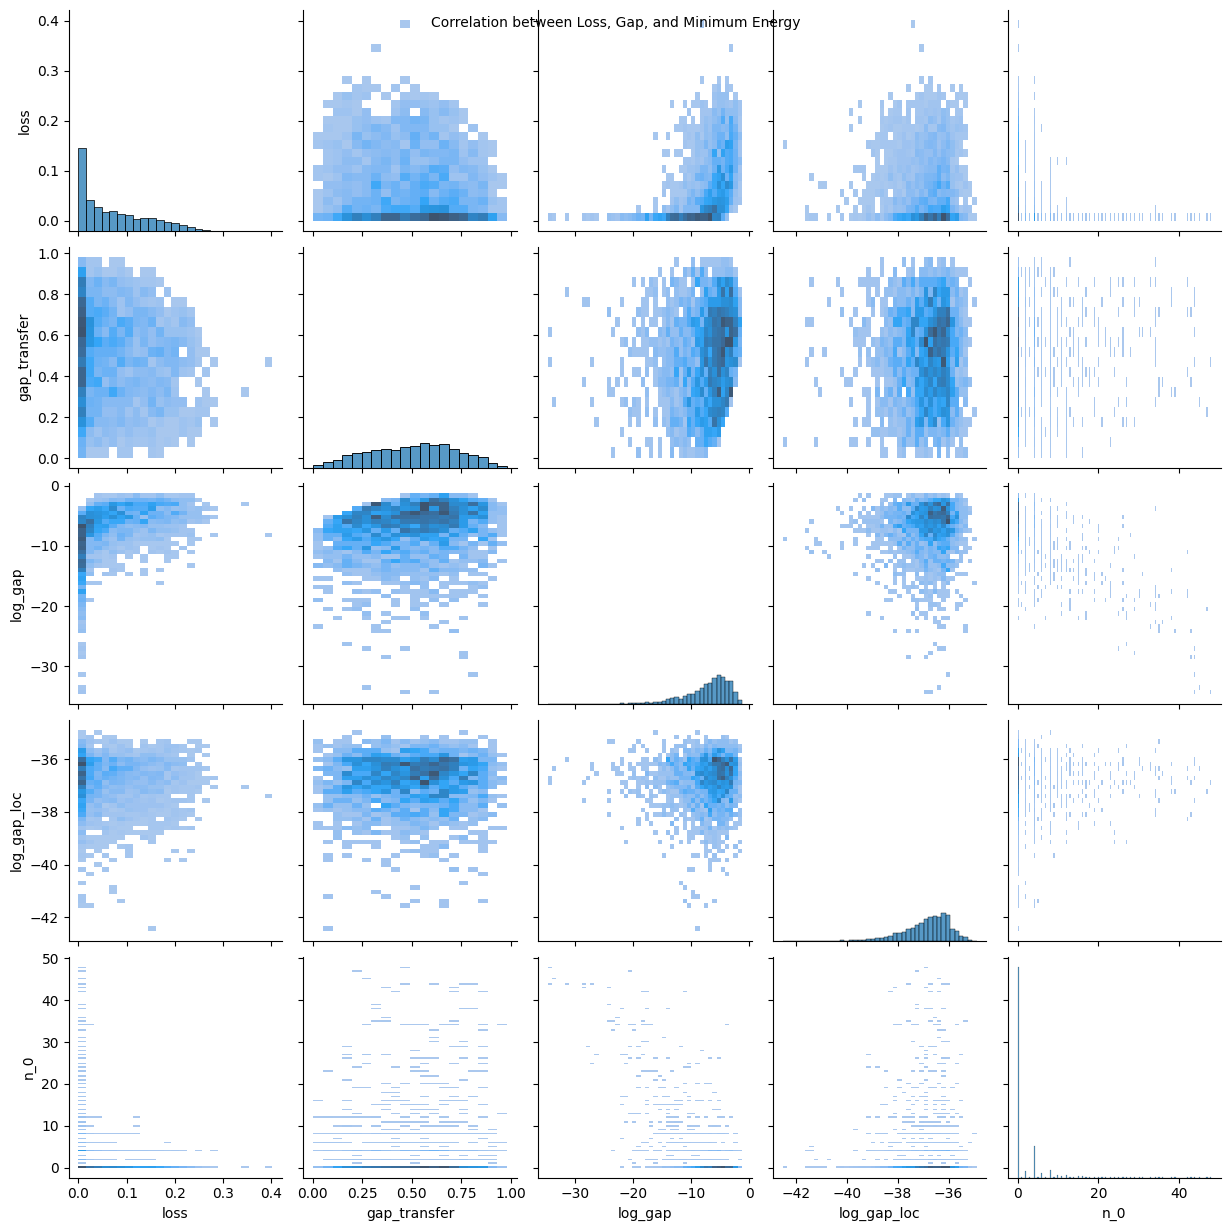

In [45]:
df = pd.DataFrame(res)
df['min_energy'] = df['E'].apply(lambda x: x[1])
df["log_gap"] = df.gap.apply(np.log)
df["log_gap_loc"] = df.gap_loc.apply(np.log)
df["log_loss"] = df.loss.apply(lambda x: np.log(x+0.0001))
# Create a pairplot to visualize the correlations between loss, gap, and minimum energy.
sns.pairplot(df[['loss', 'gap_transfer', "log_gap", "log_gap_loc", "n_0"]] , kind='hist')

# Set titles and labels.
plt.suptitle('Correlation between Loss, Gap, and Minimum Energy', size=10)
plt.show()

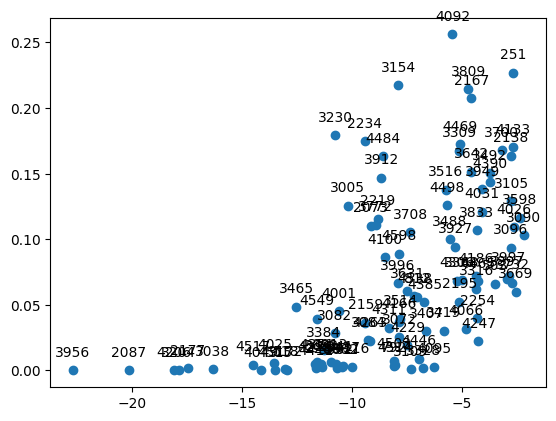

In [47]:
import matplotlib.pyplot as plt
sample_df = df.sample(100)
plt.scatter(sample_df['log_gap'], sample_df['loss'])  # Plot each point
for i in range(len(sample_df)):
    plt.annotate(sample_df['seed'].iloc[i],  # This is the text to display
                 (sample_df['log_gap'].iloc[i], sample_df['loss'].iloc[i]),  # This is the point to which the text is annotated
                 textcoords="offset points",  # how to position the text
                 xytext=(0,10),  # distance from text to points (x,y)
                 ha='center')  # horizontal alignment can be left, right or center

plt.show()

In [76]:
seed = 4247
np.set_printoptions(threshold=np.inf, linewidth=200, suppress=True)

parent_dir = f"../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_{seed}/1_mel_Adam/lr_0.001_epoch_10000"
try:
    u_path, lv = path_with_lowest_loss(parent_dir)
    u = np.load(u_path + "/u/0.npy")
except:
    print(f"there are no matrix under the path = {parent_dir}")
print(u_path)
A = FF.block1D(bd, sps, bd, seed=seed)
A_ = A.transpose(1,0,2)
A_tilde = np.einsum("ijk,ilm->jlkm", A_, A_).reshape(4,4)
sle = np.sort(np.linalg.eigvals(A_tilde))[::-1]
print(sle.real)
A2 = np.einsum("ijk,klm->jlim", A, A).reshape(sps**2, bd**2)
U, s , V = np.linalg.svd(A2)
Up = U[:, len(s):]
h = Up @ Up.T
max_gap = 0
for L in range(3,7):
    H = sum_ham(h, [[i, (i + 1) % L] for i in range(L)], L, sps)
    E = np.linalg.eigvalsh(H)
    gap = E[1] - E[0]
    max_gap = max(gap, max_gap)
    print(max_gap, seed)
e = np.linalg.eigvalsh(h)
# h = np.load(f"../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_{seed}/1_mel_Adam/lr_0.001_epoch_10000/H/0.npy")
U = np.kron(u,u)
hu = U @ h @ U.T
print(e)
print(np.linalg.eigvalsh(stoquastic(hu)))
np.round(hu,4)

../array/torch/FF1D_loc_quetta/s_3_r_2_lt_1_d_1_seed_4247/1_mel_Adam/lr_0.001_epoch_10000/loss_0.02242
[[ 0.  0.]
 [-0.  0.]]
[ 1.          0.20260842  0.00270947 -0.03090407]
0.010215492649498989 4247
0.014333364308237822 4247
0.018355150430510815 4247
0.02010617061648101 4247
[-0.  0.  0.  0.  1.  1.  1.  1.  1.]
[-0.02244585  0.00197508  0.00459259  0.01628246  0.99682866  0.99946125  1.0005755   1.00103032  1.00169999]


array([[ 0.0065, -0.0001,  0.    , -0.0001,  0.0012,  0.0061,  0.    ,  0.0061, -0.08  ],
       [-0.0001,  0.3669,  0.191 , -0.0062, -0.0019, -0.0026, -0.0131, -0.441 , -0.0328],
       [ 0.    ,  0.191 ,  0.9419, -0.0131, -0.0097, -0.0097,  0.0084,  0.1331,  0.009 ],
       [-0.0001, -0.0062, -0.0131,  0.3669, -0.0019, -0.441 ,  0.191 , -0.0026, -0.0328],
       [ 0.0012, -0.0019, -0.0097, -0.0019,  0.0004, -0.0001, -0.0097, -0.0001, -0.0145],
       [ 0.0061, -0.0026, -0.0097, -0.441 , -0.0001,  0.6927,  0.1331, -0.0007, -0.0223],
       [ 0.    , -0.0131,  0.0084,  0.191 , -0.0097,  0.1331,  0.9419, -0.0097,  0.009 ],
       [ 0.0061, -0.441 ,  0.1331, -0.0026, -0.0001, -0.0007, -0.0097,  0.6927, -0.0223],
       [-0.08  , -0.0328,  0.009 , -0.0328, -0.0145, -0.0223,  0.009 , -0.0223,  0.99  ]])

In [65]:
np.set_printoptions(threshold=np.inf, linewidth=200, suppress=True)
np.abs(np.round(hu,4))

array([[1.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 1.    , 0.    , 0.    , 0.    , 0.0033, 0.    , 0.0002, 0.0001],
       [0.    , 0.    , 1.    , 0.    , 0.0008, 0.0051, 0.    , 0.    , 0.0003],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.0002, 0.    , 0.0033, 0.0001],
       [0.    , 0.    , 0.0008, 0.    , 0.    , 0.    , 0.0008, 0.    , 0.    ],
       [0.    , 0.0033, 0.0051, 0.0002, 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.0008, 0.    , 1.    , 0.0051, 0.0003],
       [0.    , 0.0002, 0.    , 0.0033, 0.    , 0.    , 0.0051, 0.    , 0.    ],
       [0.    , 0.0001, 0.0003, 0.0001, 0.    , 0.    , 0.0003, 0.    , 0.    ]])

In [53]:
np.linalg.eigvalsh(stoquastic(hu))

array([-1.42199779e-05,  6.15984287e-07,  2.12151768e-06,  1.14826454e-05,
        9.99999836e-01,  9.99999837e-01,  9.99999999e-01,  1.00000015e+00,
        1.00000018e+00])

In [65]:
h.reshape(3,3,3,3)[0,1,2,2]

0.08666729480800987

In [66]:
np.linalg.norm(h.reshape(3,3,3,3).transpose(1,0,3,2) - h.reshape(3,3,3,3))

2.7888838806371987e-13

In [39]:
import sys
sys.path.append("../")
import numpy as np 
from utils import *
from lattice import *
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensornetwork as tn
seed = 0
bd = 8
A = FF.block1D(bd, 3, bd, seed=seed, canonical=False)
def cal_gap_t(A, t):
    A = np.copy(A)
    A[:,1] = A[:,1] * t
    A[0,:,1] = t * A[0,:,1]
    A_tilde = np.einsum("jik,lim->jlkm", A, A).reshape(bd**2, bd**2)
    e, V = np.linalg.eig(A_tilde)
    idx = np.argmax(e)
    x = V[:,idx]
    x = x.reshape(bd,bd)
    print(x)
    e = np.sort(np.abs(e))
    e = e/e[-1]
    return e[-1] - e[-2]

In [40]:
cal_gap_t(A, 2)

[[ 0.09869179+0.j  0.03202549+0.j  0.01537105+0.j -0.00558172+0.j
  -0.02341438+0.j  0.02625568+0.j  0.06167939+0.j  0.07457986+0.j]
 [ 0.03202549+0.j  0.33375293+0.j  0.12932699+0.j -0.1078573 +0.j
  -0.12006992+0.j  0.04204289+0.j  0.24853499+0.j  0.28815122+0.j]
 [ 0.01537105+0.j  0.12932699+0.j  0.06176057+0.j -0.05305103+0.j
  -0.06433364+0.j  0.02268754+0.j  0.10320571+0.j  0.12443807+0.j]
 [-0.00558172+0.j -0.1078573 +0.j -0.05305103+0.j  0.05712293+0.j
   0.05136588+0.j -0.01889225+0.j -0.08258005+0.j -0.09998434+0.j]
 [-0.02341438+0.j -0.12006992+0.j -0.06433364+0.j  0.05136588+0.j
   0.1237083 +0.j -0.04267538+0.j -0.09886573+0.j -0.1284686 +0.j]
 [ 0.02625568+0.j  0.04204289+0.j  0.02268754+0.j -0.01889225+0.j
  -0.04267538+0.j  0.04606345+0.j  0.0579548 +0.j  0.06358187+0.j]
 [ 0.06167939+0.j  0.24853499+0.j  0.10320571+0.j -0.08258005+0.j
  -0.09886573+0.j  0.0579548 +0.j  0.23233948+0.j  0.25546101+0.j]
 [ 0.07457986+0.j  0.28815122+0.j  0.12443807+0.j -0.09998434+0.j
  -

0.17637795870434403

## AKLT

In [92]:
A = np.zeros((3, 2, 2))
A[0][1,0] = -1/np.sqrt(2)
A[2][0,1] = 1/np.sqrt(2)
A[1][0,0] = 1/2
A[1][1,1] = -1/2
A = get_canonical_form(A)
A_ = A.transpose(1,0,2)
A_tilde = np.einsum("ijk,ilm->jlkm", A_, A_).reshape(4,4)
sle = np.sort(np.linalg.eigvals(A_tilde))[::-1]

ValueError: middle index should represent physical index and the side indices should be virtual indices

### Remove high gapped data
tbd

# Canonical form

In [13]:
df

,seed,E,loss,gap,sle,min_energy,log_gap,sqrt_loss,log_loss
0,0,"[1.9438717679825833e-14, 0.014409947267734775,...",0.17387,1.440995e-02,0.463733,1.440995e-02,-4.239837,0.416977,-1.748872
1,1,"[-1.5771065317389434e-15, 3.8080840688647246e-...",0.00000,3.808084e-08,0.650810,3.808084e-08,-17.083555,0.000000,-9.210340
2,2,"[-7.138036391334365e-15, 3.0888942128807335e-0...",0.00002,3.088895e-08,0.936650,3.088894e-08,-17.292867,0.004472,-9.028019
3,3,"[-7.086522186275027e-16, 0.02242465732606774, ...",0.26422,2.242466e-02,0.268709,2.242466e-02,-3.797594,0.514023,-1.330595
4,4,"[-3.078436633873759e-15, 0.012584317829214485,...",0.09499,1.258432e-02,0.330738,1.258432e-02,-4.375304,0.308204,-2.352931
...,...,...,...,...,...,...,...,...,...
95,95,"[-1.5689591293503792e-17, 1.3095670926367155e-...",0.00135,1.309567e-06,0.648040,1.309567e-06,-13.545814,0.036742,-6.536192
96,96,"[-1.017163421314269e-15, 2.4734429547128766e-1...",0.00000,2.474460e-12,0.793034,2.473443e-12,-26.724999,0.000000,-9.210340
97,97,"[-1.0692467418360418e-15, 6.729505611033403e-0...",0.00083,6.729506e-07,0.496371,6.729506e-07,-14.211594,0.028810,-6.980326
98,98,"[-1.0489672406393248e-14, 0.12618235696312238,...",0.05733,1.261824e-01,0.353133,1.261824e-01,-2.070027,0.239437,-2.857188


## Calculate transfer matrix

In [8]:
# for seed in range(0, 11):
seed = 0
A = FF.block1D(bd, sps, bd, seed=seed)
A_ = A.transpose(1,0,2)
A_tilde_ = np.einsum("ijk,ilm->jlkm", A_, A_)
A_tilde = A_tilde_.reshape(4,4)
e, V = np.linalg.eigh(A_tilde)
rho = e[-1]
A_tilde = A_tilde / rho

e, V = np.linalg.eigh(A_tilde)
x = V[:,-1].reshape(2,2)

e, U = np.linalg.eigh(x)
x_h = U @ np.diag(np.sqrt(e + 0j)) @ U.T
x_h_inv = U @ np.diag(1/np.sqrt(e + 0j)) @ U.T

B = x_h_inv @ A_ @ x_h / np.sqrt(rho) #canonical form
B = B.transpose(1,0,2)


In [9]:
check_cano = np.einsum("jik, lik->jl",B, B)
print("is identity : ",  np.linalg.norm(np.eye(2) - check_cano))

is identity :  2.9373740229761033e-16


### Spectrum must be same for A and B

In [10]:
B_ = B.transpose(1,0,2)
B_tilde_ = np.einsum("ijk,ilm->jlkm", B_, B_).reshape(4,4)
Eb = np.linalg.eigvals(B_tilde_)
Ea = np.linalg.eigvals(A_tilde)
print(np.linalg.norm(Ea.real - Eb.real))
print(Eb[1].real)
print(Ea[1])

2.665835984225005e-16
0.46373257491552144
0.4637325749155212


### aggrigate all second largest eigenvalue and store into dataframe 

### Check both actually return same MPS

In [118]:
mps_nodes, mps_edges = FF.create_MPS(6, A)
for k in range(len(mps_edges)):
    C = tn.contract(mps_edges[k])
y1 = C.tensor.reshape(-1)
y1 /= np.linalg.norm(y1)

mps_nodes, mps_edges = FF.create_MPS(6, B)
for k in range(len(mps_edges)):
    C = tn.contract(mps_edges[k])
y2 = C.tensor.reshape(-1)
y2 /= np.linalg.norm(y2)
print("y1 - y2 : ", np.linalg.norm(y1-y2))

y1 - y2 :  8.987388080934195e-16


In [165]:
Ea, Eb

(array([1.        , 0.46373257, 0.1586023 , 0.12083966]),
 array([1.        +0.j, 0.46373257+0.j, 0.1586023 +0.j, 0.12083966+0.j]))

In [37]:
for key, val in res.items():
    print(f'loss: {val["loss"]}')
    print(f'gap : {val["gap"]}')
    print(f"et : {val['et']}")
    print(f"et2 : {val['et2']}")
    print("\n")

loss: 0.17387
gap : 0.014409947267715335
et : [1.07903285 1.41623274 4.14088113 8.92945925]
et2 : [ 1.16431189  2.00571517 17.14689655 79.73524257]


loss: 0.0
gap : 3.808084226575378e-08
et : [-3.52683104 -2.4892931   3.46655985  5.3265312 ]
et2 : [ 6.19658016 12.01703717 12.43853718 28.37193457]


loss: 2e-05
gap : 3.088894926684373e-08
et : [-1.80583275 -1.69885453  7.63632091  8.15280263]
et2 : [ 2.8861067   3.26103194 58.31339699 66.46819078]


loss: 0.26422
gap : 0.022424657326068447
et : [-3.0497284  -0.4825839   1.14272441  4.25264852]
et2 : [ 0.23288722  1.30581908  9.30084333 18.08501945]


loss: 0.09499
gap : 0.012584317829217564
et : [0.7080587  0.83183422 0.92752041 2.80439502]
et2 : [0.50134713 0.69194816 0.86029412 7.86463145]


loss: 0.06638
gap : 0.00510515577127765
et : [-1.50881426 -0.8815801   0.66147717  6.17440182]
et2 : [ 0.43755205  0.77718348  2.27652046 38.12323784]


loss: 0.027
gap : 0.00046814891419191395
et : [-5.25731758 -2.88693889  2.25853235 12.8175936